# Proyek Machine Learning Pemula: Healthy Lifestyle Dataset
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

# **1. Perkenalan Dataset**


### Penjelasan Singkat tentang Dataset *Healthy Lifestyle*  

Dataset *Healthy Lifestyle* berisi informasi tentang berbagai faktor yang mempengaruhi kesehatan individu, seperti pola makan, kebiasaan olahraga, konsumsi alkohol, tidur, dan kondisi kesehatan bawaan. Dataset ini dapat digunakan untuk analisis korelasi, eksplorasi data, atau pengembangan model prediktif untuk memahami pola hidup sehat.  

Beberapa fitur utama dalam dataset ini meliputi usia, BMI, kebiasaan merokok, lingkungan tempat tinggal, kepatuhan terhadap diet, tingkat aktivitas fisik, dan kesehatan mental. Selain itu, dataset ini mencakup data tentang jumlah penyakit yang dialami dalam satu tahun terakhir, yang dapat digunakan untuk memahami hubungan antara gaya hidup dan kesehatan individu.  

Dataset ini tersedia di Kaggle dan bisa digunakan untuk penelitian di bidang kesehatan masyarakat maupun analisis data lainnya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

Library diatas merupakan persiapan untuk analisis data dan penerapan metode clustering menggunakan Python. berikut penjelasan mengani library yang di import:

### **1. Import Library**  
Library pertama  digunakan untuk manipulasi data, visualisasi, dan analisis machine learning:  
- `pandas`: Untuk manipulasi data berbasis tabel (DataFrame).  
- `numpy`: Untuk operasi matematika dan array numerik.  
- `matplotlib.pyplot`: Untuk membuat visualisasi data dasar.  
- `seaborn`: Untuk membuat visualisasi data lebih menarik dan informatif.  

### **2. Data Preprocessing**  
Beberapa pustaka dari `sklearn` digunakan untuk menangani data sebelum analisis:  
- `SimpleImputer`: Mengisi nilai yang hilang dalam dataset.  
- `OneHotEncoder`: Mengubah data kategorikal menjadi format numerik menggunakan one-hot encoding.  
- `LabelEncoder`: Mengubah label kategorikal menjadi angka.  
- `MinMaxScaler`: Melakukan normalisasi data dengan skala antara 0 dan 1.  

### **3. Clustering (Pengelompokan Data)**  
- `KMeans`: Algoritma clustering berbasis centroid yang membagi data ke dalam *k* kelompok.  
- `MiniBatchKMeans`: Versi lebih cepat dari KMeans yang bekerja dengan batch kecil dari dataset.  
- `silhouette_score`: Mengukur kualitas clustering berdasarkan kesamaan dalam kelompok.  

### **4. Feature Selection (Seleksi Fitur)**  
- `VarianceThreshold`: Menghapus fitur dengan variabilitas rendah yang tidak memberikan banyak informasi dalam analisis.  

### **5. Gaussian Mixture Model (GMM)**  
- `GaussianMixture`: Model clustering berbasis probabilitas yang mengasumsikan bahwa data berasal dari beberapa distribusi Gaussian.  

### **6. Dimensionality Reduction (Reduksi Dimensi)**  
- `PCA (Principal Component Analysis)`: Mengurangi jumlah fitur dalam dataset sambil mempertahankan informasi sebanyak mungkin.  


# **3. Memuat Dataset**

In [34]:
#Type your code here

data = pd.read_csv("data/dataset.csv")

data.shape

(6480, 17)

Pada tahap ini, dilakukan proses **pemuatan dataset** ke dalam program menggunakan pandas. Dataset yang digunakan berbentuk file CSV yang disimpan dalam direktori tertentu.  

Setelah dataset berhasil dimuat, langkah berikutnya adalah **memeriksa dimensi data**. Ini bertujuan untuk mengetahui jumlah baris dan kolom dalam dataset, sehingga dapat memberikan gambaran awal tentang ukuran data yang akan dianalisis.  

Mengetahui dimensi dataset sangat penting dalam tahap eksplorasi awal, karena dapat membantu dalam memahami seberapa besar data yang dikelola serta menentukan teknik pra-pemrosesan yang sesuai sebelum melakukan analisis lebih lanjut.

# **4. Exploratory Data Analysis (EDA)**

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        6480 non-null   int64  
 1   Specific ailments          6480 non-null   int64  
 2   ID2                        6480 non-null   int64  
 3   Food preference            6477 non-null   object 
 4   Age                        6480 non-null   int64  
 5   BMI                        6480 non-null   float64
 6   Smoker?                    6480 non-null   object 
 7   Living in?                 6480 non-null   object 
 8   Any heriditary condition?  6480 non-null   object 
 9   Follow Diet                6218 non-null   float64
 10  Physical activity          6218 non-null   float64
 11  Regular sleeping hours     6218 non-null   float64
 12  Alcohol consumption        6218 non-null   float64
 13  Social interaction         6218 non-null   float

Pada tahap ini, dilakukan proses **pemeriksaan struktur dataset**. Langkah ini penting untuk memahami jenis data yang ada dalam setiap kolom, jumlah total entri, serta mendeteksi adanya nilai yang hilang (*missing values*).  

Hasil yang diperoleh menunjukkan jumlah baris dalam dataset serta jumlah kolom yang tersedia. Selain itu, setiap kolom dikategorikan berdasarkan tipe datanya, seperti numerik (integer atau float) dan kategorikal (object).  

Dengan melihat informasi ini, dapat diidentifikasi apakah terdapat kolom dengan nilai yang hilang, sehingga langkah selanjutnya adalah menentukan teknik yang tepat untuk menangani data yang tidak lengkap. Selain itu, pemahaman tentang tipe data membantu dalam memilih metode pemrosesan yang sesuai sebelum melanjutkan ke tahap analisis atau *machine learning*.

In [36]:
#Type your code here

data.isna().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

Pada tahap ini, dilakukan proses **pemeriksaan nilai yang hilang** (*missing values*) dalam dataset. Hal ini penting untuk mengetahui apakah ada kolom yang memiliki data yang tidak lengkap, sehingga bisa dipersiapkan strategi untuk menanganinya.  

Hasil analisis menunjukkan bahwa terdapat beberapa kolom dengan nilai yang hilang. Sebagai contoh, kolom *Food preference* hanya memiliki 3 nilai yang hilang, sementara beberapa kolom lainnya, seperti *Follow Diet*, *Physical activity*, dan *Mental health management*, memiliki 262 nilai yang hilang.  

Langkah selanjutnya setelah identifikasi ini adalah menentukan metode yang tepat untuk menangani data yang hilang, seperti **menghapus baris atau kolom tertentu, mengganti dengan nilai rata-rata (mean) atau median, atau menggunakan teknik imputasi lainnya**. Keputusan ini bergantung pada sejauh mana data yang hilang dapat mempengaruhi analisis keseluruhan.

In [37]:
duplicate_rows_all = data[data.duplicated(keep=False)]
print(duplicate_rows_all)

Empty DataFrame
Columns: [ID1, Specific ailments, ID2, Food preference, Age, BMI, Smoker?, Living in?, Any heriditary condition?, Follow Diet, Physical activity, Regular sleeping hours, Alcohol consumption, Social interaction, Taking supplements, Mental health management, Illness count last year]
Index: []


Pada tahap ini, dilakukan **pemeriksaan data duplikat** dalam dataset. Pemeriksaan ini bertujuan untuk mengidentifikasi apakah ada baris yang memiliki nilai identik di semua kolom, yang dapat mengindikasikan redundansi dalam data.  

Hasil analisis menunjukkan bahwa **tidak ada data duplikat** dalam dataset, ditandai dengan keluarnya *Empty DataFrame*. Ini berarti setiap baris dalam dataset memiliki nilai yang unik atau tidak ada baris yang sama persis dengan lainnya.  

Jika ditemukan duplikasi dalam dataset, langkah selanjutnya biasanya adalah menghapus atau menangani data tersebut sesuai dengan konteks analisis. Namun, karena dalam kasus ini tidak ditemukan duplikasi, maka tidak diperlukan tindakan lebih lanjut terkait penghapusan data redundan.

In [38]:
data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


Pada tahap ini, dilakukan **pemeriksaan awal terhadap isi dataset** dengan menampilkan beberapa baris pertama dari data. Langkah ini bertujuan untuk mendapatkan gambaran awal tentang struktur dataset, termasuk bagaimana data diatur dalam setiap kolom.  

Dengan melihat data secara langsung, dapat diperoleh wawasan mengenai:  
- **Jenis data yang tersimpan** di setiap kolom (angka, teks, kategori, dll.).  
- **Format dan konsistensi data**, apakah ada anomali atau ketidaksesuaian dalam pengisian data.  
- **Kehadiran nilai kosong atau tidak wajar**, yang mungkin tidak langsung terlihat dalam pemeriksaan informasi dataset sebelumnya.  

Langkah ini penting sebelum melakukan eksplorasi dan analisis lebih lanjut agar pemahaman terhadap data menjadi lebih baik.

In [39]:
# 2️⃣ Cek statistik deskriptif
print(data.describe())

                ID1  Specific ailments           ID2          Age  \
count   6480.000000        6480.000000   6480.000000  6480.000000   
mean   16494.327315          26.438580   6231.783333    33.162809   
std     9571.456873          15.026671   3590.334525    19.517538   
min        4.000000           0.000000      2.000000     0.000000   
25%     8173.000000          13.000000   3129.250000    16.000000   
50%    16376.000000          27.000000   6237.500000    33.000000   
75%    24943.750000          39.000000   9350.250000    50.000000   
max    33013.000000          52.000000  12514.000000   123.000000   

               BMI  Follow Diet  Physical activity  Regular sleeping hours  \
count  6480.000000  6218.000000        6218.000000             6218.000000   
mean     23.389791     0.899646           0.138469                0.184947   
std       3.818306     0.300495           0.345419                0.388286   
min       1.089300     0.000000           0.000000                

Pada tahap ini, dilakukan **analisis statistik deskriptif** terhadap dataset. Statistik deskriptif memberikan ringkasan numerik dari data, yang berguna untuk memahami distribusi dan karakteristik setiap variabel.  

Dari hasil analisis ini, dapat diperoleh informasi seperti:  
- **Ukuran pemusatan data**: Mean (rata-rata) dan median.  
- **Ukuran penyebaran data**: Standard deviation (deviasi standar), min, max, dan quartiles (Q1, Q2, Q3).  
- **Rentang nilai data**: Nilai minimum dan maksimum dalam setiap kolom.  
- **Pendeteksian outlier**: Jika terdapat nilai minimum atau maksimum yang sangat jauh dari nilai rata-rata, kemungkinan terdapat outlier dalam dataset.  

Tahap ini sangat penting dalam eksplorasi data karena memberikan wawasan awal tentang bagaimana data terdistribusi dan apakah ada anomali yang perlu ditangani sebelum dilakukan analisis lebih lanjut.

In [40]:
# Mengambil kolom dengan tipe data object
object_columns = data.select_dtypes(include=['object']).columns

# Melakukan iterasi pada setiap kolom object dan mencetak nilai uniknya
for col in object_columns:
    print(f"Kolom '{col}':", data[col].unique())


Kolom 'Food preference': ['DX6' 'DX1 ' 'DX4 ' 'DX5 ' 'DX3 DX4 ' 'DX2 ' 'DX3 ' 'DX3 DX5 ' 'DX2 DX4 '
 'DX1 DX3 ' 'DX1 DX4 ' 'DX1 DX5 ' 'DX3 DX4 DX5 ' 'DX2 DX5 ' 'DX2 DX3 '
 'DX4 DX5 ' 'DX1 DX2 DX5 ' 'DX1 DX2 ' 'DX1 DX3 DX4 ' 'DX2 DX3 DX4 '
 'DX1 DX3 DX5 ' 'DX2 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX2 DX3 DX5 ' nan 'DX1 DX2 DX3 ' 'DX1 DX2 DX4 ' 'DX1 DX2 DX3 DX4 '
 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX5 ']
Kolom 'Smoker?': ['YES' 'NO' 'Cannot say']
Kolom 'Living in?': ['URBAN' 'RURAL']
Kolom 'Any heriditary condition?': ['Stable']


Pada tahap ini, dilakukan **pemeriksaan nilai unik dalam kolom-kolom bertipe data kategorikal (object)**. Langkah ini penting untuk memahami kemungkinan kategori yang ada dalam dataset dan untuk mendeteksi inkonsistensi dalam data.  

Beberapa hal yang dapat diidentifikasi dari hasil pemeriksaan ini:  
- **Kolom ‘Food preference’** memiliki berbagai kombinasi kode seperti `DX6`, `DX1 DX3`, dll., dengan kemungkinan adanya spasi yang tidak konsisten setelah beberapa nilai. Selain itu, terdapat nilai **NaN (missing value)** yang perlu ditangani.  
- **Kolom ‘Smoker?’** memiliki tiga kategori: `YES`, `NO`, dan `Cannot say`, yang mungkin perlu diubah menjadi format numerik untuk analisis lebih lanjut.  
- **Kolom ‘Living in?’** memiliki dua kategori: `URBAN` dan `RURAL`, yang merupakan tipe data biner dan dapat dikonversi ke nilai numerik (misalnya, `0` dan `1`).  
- **Kolom ‘Any heriditary condition?’** hanya memiliki satu nilai, yaitu `Stable`, yang berarti kolom ini tidak memberikan informasi yang bervariasi dan mungkin dapat dihapus karena tidak memiliki signifikansi dalam analisis.  

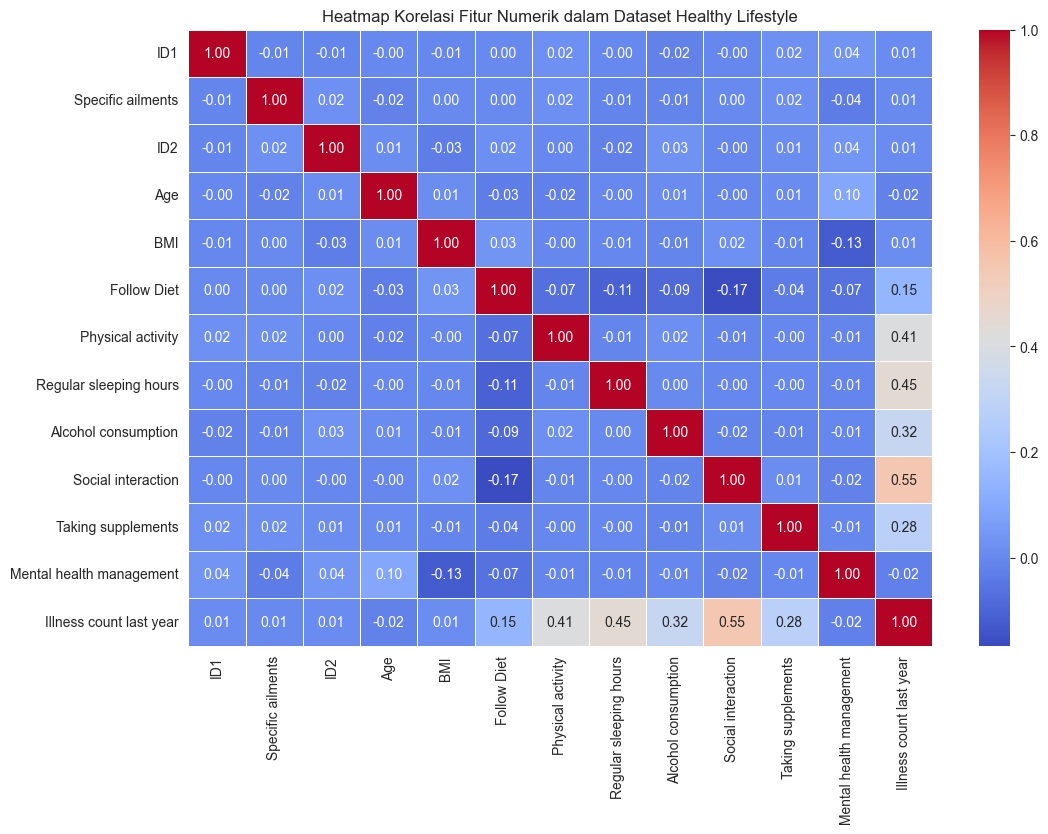

In [47]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik dalam Dataset Healthy Lifestyle")
plt.show()


Pada tahap ini, dilakukan **analisis korelasi antar fitur numerik** dalam dataset menggunakan heatmap. Korelasi membantu dalam memahami hubungan antara variabel-variabel numerik, sehingga dapat digunakan untuk:  
- **Mengidentifikasi fitur yang berkaitan erat**, yang dapat membantu dalam pemilihan variabel untuk analisis lebih lanjut.  
- **Mendeteksi multikolinearitas**, yaitu kondisi ketika dua atau lebih variabel sangat berkorelasi, yang bisa mempengaruhi model analisis atau machine learning.  
- **Menemukan pola tersembunyi** dalam dataset, seperti hubungan antara gaya hidup dan jumlah penyakit dalam satu tahun terakhir.  

Hasil heatmap menunjukkan bahwa sebagian besar fitur memiliki korelasi rendah satu sama lain (ditunjukkan oleh warna biru). Namun, ada beberapa hubungan menarik yang dapat diperhatikan, seperti:  
- **Korelasi tinggi antara "Social interaction" dan "Illness count last year" (0.55)**, yang mungkin menunjukkan bahwa faktor sosial mempengaruhi kesehatan.  
- **"Regular sleeping hours" dan "Illness count last year" memiliki korelasi sebesar 0.45**, yang bisa mengindikasikan hubungan antara pola tidur dengan kesehatan.  
- **"Physical activity" dan "Illness count last year" memiliki korelasi 0.41**, yang menunjukkan bahwa aktivitas fisik mungkin berperan dalam menjaga kesehatan.  

Tahap ini membantu dalam pemahaman data sebelum dilakukan analisis lebih lanjut, seperti pembuatan model prediksi atau clustering.

# **5. Data Preprocessing**

In [48]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy="median")
data[num_cols] = imputer_num.fit_transform(data[num_cols])

cat_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy="most_frequent")
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

print("Missing values setelah imputasi:\n", data.isna().sum())

Missing values setelah imputasi:
 ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
dtype: int64


Pada tahap ini, dilakukan **penanganan nilai yang hilang (missing values) menggunakan teknik imputasi**. Teknik ini bertujuan untuk mengisi data yang kosong sehingga dataset menjadi lengkap dan siap untuk analisis lebih lanjut.  

**Langkah-langkah yang dilakukan:**  
1. **Mengidentifikasi kolom numerik dan kategorikal**  
   - Kolom numerik (`float64` dan `int64`) diproses menggunakan metode **median** sebagai strategi imputasi. Median dipilih karena lebih tahan terhadap outlier dibandingkan rata-rata (mean).  
   - Kolom kategorikal (`object`) diproses dengan mengisi nilai kosong menggunakan **kategori yang paling sering muncul** (*most frequent*).  

2. **Menggunakan `SimpleImputer` untuk mengisi nilai yang hilang**  
   - Untuk kolom numerik, setiap nilai yang hilang diganti dengan nilai median dari kolom tersebut.  
   - Untuk kolom kategorikal, setiap nilai yang hilang diganti dengan kategori yang paling sering muncul di kolom tersebut.  

3. **Memeriksa kembali apakah masih ada missing values setelah imputasi**  
   - Hasil menunjukkan bahwa **semua nilai yang hilang telah terisi**, ditandai dengan jumlah missing values di setiap kolom menjadi nol.  

Dengan langkah ini, dataset menjadi lebih lengkap dan siap untuk tahap analisis atau pemodelan lebih lanjut tanpa adanya kendala akibat data yang tidak lengkap.

In [49]:
le_smoker = LabelEncoder()
le_food = LabelEncoder()
le_hereditary = LabelEncoder()

data['Smoker?'] = le_smoker.fit_transform(data['Smoker?'])
data['Food preference'] = le_food.fit_transform(data['Food preference'])
data['Any heriditary condition?'] = le_hereditary.fit_transform(data['Any heriditary condition?'])

  Pada tahap ini, dilakukan **encoding pada fitur kategorikal** menggunakan **Label Encoding**. Teknik ini bertujuan untuk mengubah data kategorikal menjadi format numerik agar dapat digunakan dalam analisis statistik atau algoritma machine learning yang tidak bisa bekerja dengan data non-numerik.  

**Langkah-langkah yang dilakukan:**  
1. **Membuat objek `LabelEncoder`** untuk masing-masing kolom kategorikal:  
   - `le_smoker` untuk kolom **"Smoker?"**  
   - `le_food` untuk kolom **"Food preference"**  
   - `le_hereditary` untuk kolom **"Any heriditary condition?"**  

2. **Melakukan encoding terhadap nilai dalam kolom tersebut**  
   - Setiap kategori dalam kolom dikonversi menjadi angka mulai dari `0`, `1`, `2`, dst.  
   - Misalnya, jika kolom "Smoker?" memiliki nilai **["YES", "NO", "Cannot say"]**, maka setelah encoding bisa menjadi:  
     - `"NO"` → `0`  
     - `"YES"` → `1`  
     - `"Cannot say"` → `2`  

3. **Hasilnya, dataset kini memiliki fitur kategorikal dalam format numerik**, yang lebih mudah diolah oleh model machine learning atau teknik analisis lainnya.  

Langkah ini sangat penting sebelum melakukan teknik seperti **clustering, PCA, atau model prediktif**, karena kebanyakan algoritma hanya dapat bekerja dengan data numerik.

In [50]:
if 'Living in?' in data.columns:
    ohe = OneHotEncoder(drop=None, sparse_output=False)
    encoded = ohe.fit_transform(data[['Living in?']])
    encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Living in?']))
    data = pd.concat([data, encoded_df], axis=1).drop(columns=['Living in?'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        6480 non-null   float64
 1   Specific ailments          6480 non-null   float64
 2   ID2                        6480 non-null   float64
 3   Food preference            6480 non-null   int32  
 4   Age                        6480 non-null   float64
 5   BMI                        6480 non-null   float64
 6   Smoker?                    6480 non-null   int32  
 7   Any heriditary condition?  6480 non-null   int32  
 8   Follow Diet                6480 non-null   float64
 9   Physical activity          6480 non-null   float64
 10  Regular sleeping hours     6480 non-null   float64
 11  Alcohol consumption        6480 non-null   float64
 12  Social interaction         6480 non-null   float64
 13  Taking supplements         6480 non-null   float

 Pada tahap ini, dilakukan **One-Hot Encoding (OHE) pada fitur kategorikal "Living in?"**. One-Hot Encoding digunakan untuk mengonversi data kategorikal dengan **dua atau lebih kategori** menjadi bentuk numerik dalam beberapa kolom biner terpisah.  

**Langkah-langkah yang dilakukan:**  
1. **Memeriksa apakah kolom "Living in?" ada dalam dataset**, untuk menghindari error jika kolom ini sudah dihapus atau tidak tersedia.  
2. **Menggunakan `OneHotEncoder`**  
   - `drop=None` memastikan bahwa semua kategori dikonversi ke bentuk numerik tanpa membuang kategori tertentu.  
   - `sparse_output=False` digunakan agar hasil encoding berupa array biasa, bukan bentuk *sparse matrix*.  
3. **Melakukan encoding pada kolom "Living in?"**  
   - Jika nilai yang ada dalam kolom adalah `['URBAN', 'RURAL']`, maka setelah One-Hot Encoding akan menjadi dua kolom:  
     - `Living in?_RURAL` (1 jika RURAL, 0 jika tidak)  
     - `Living in?_URBAN` (1 jika URBAN, 0 jika tidak)  
4. **Menambahkan hasil encoding ke dalam dataset**, kemudian menghapus kolom asli "Living in?" agar tidak terjadi redundansi.  
5. **Menampilkan informasi terbaru tentang dataset** (`data.info()`) untuk memastikan bahwa kolom telah dikonversi dengan benar.  



#### **Kenapa One-Hot Encoding digunakan di sini?**  
- One-Hot Encoding lebih cocok untuk variabel **kategorikal nominal** (tanpa urutan tertentu), seperti "Living in?" yang memiliki kategori `URBAN` dan `RURAL`.  
- Label Encoding tidak cocok dalam kasus ini karena akan memberikan nilai numerik (`0, 1`) yang bisa disalahartikan sebagai hubungan urutan antar kategori.  

Dengan langkah ini, dataset kini lebih siap untuk digunakan dalam analisis lebih lanjut atau diterapkan dalam algoritma machine learning yang membutuhkan data dalam bentuk numerik.

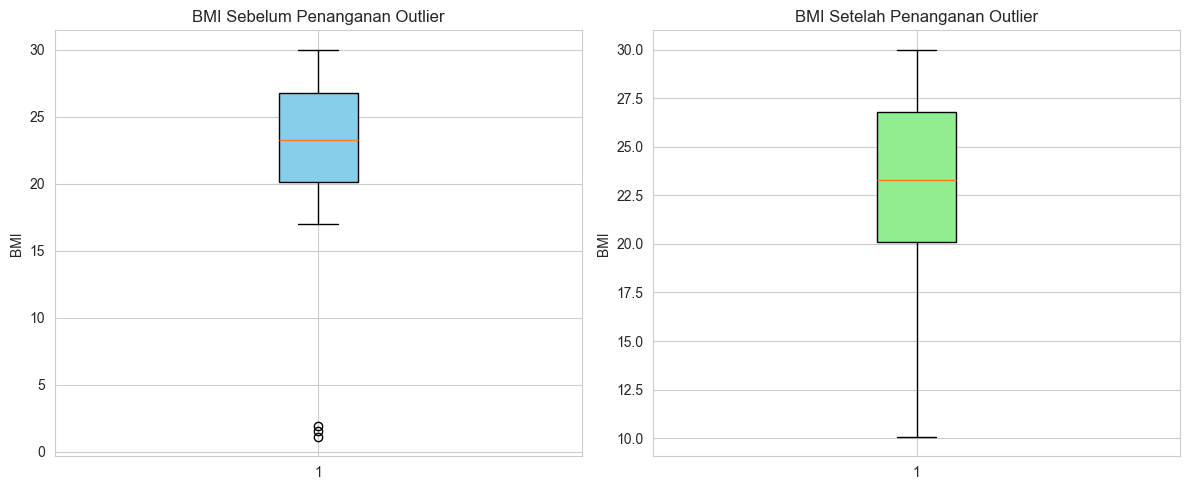

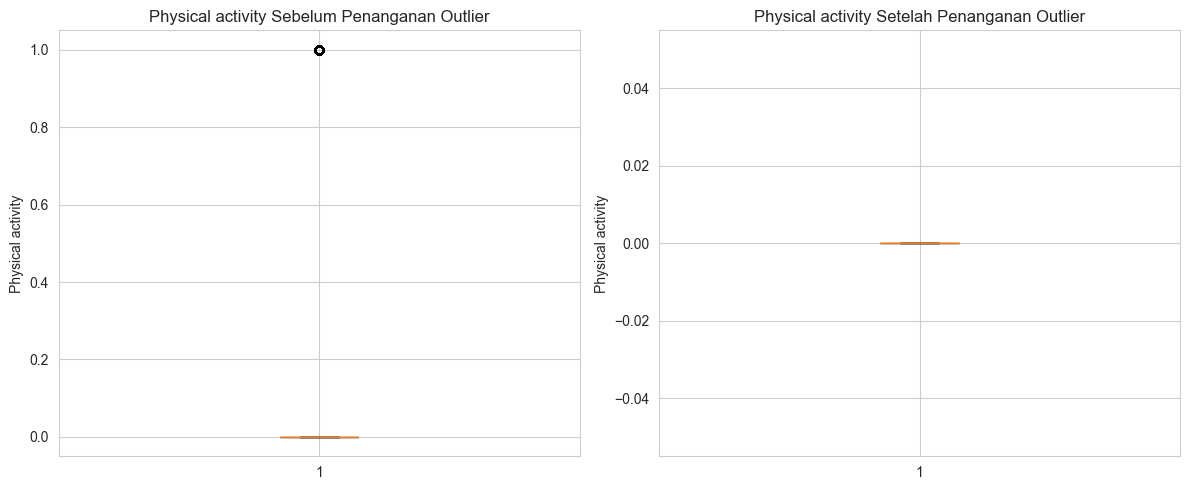

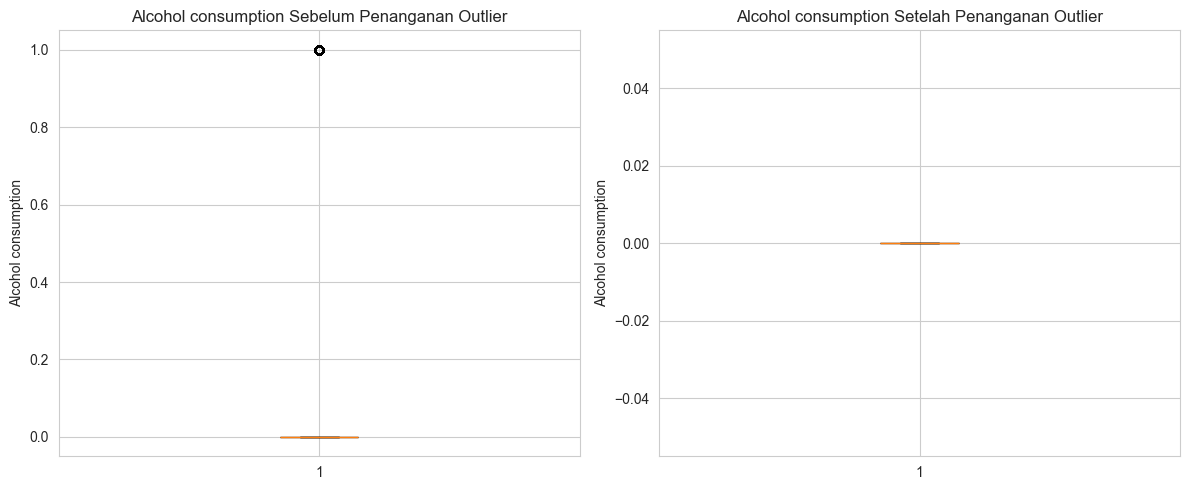

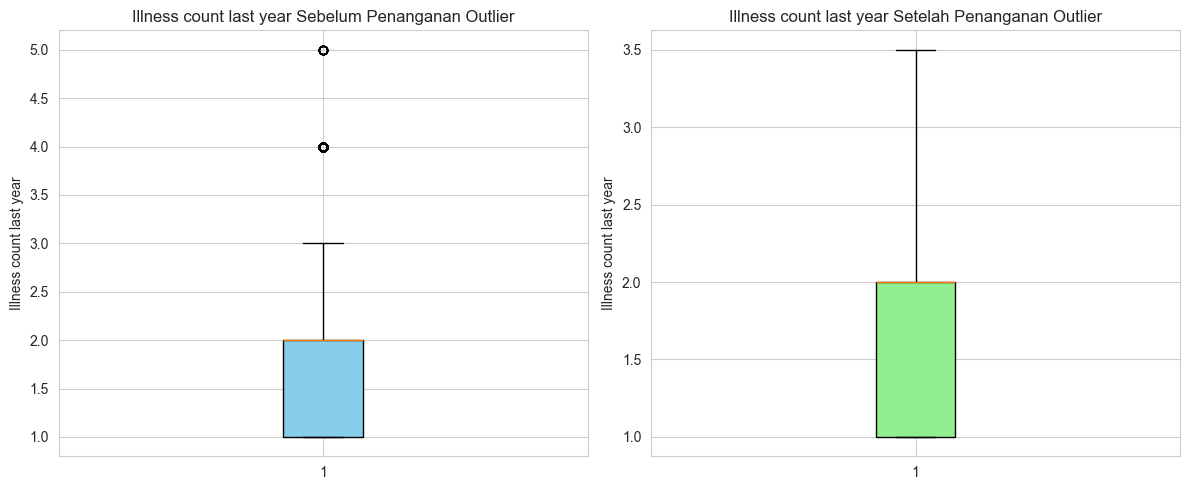

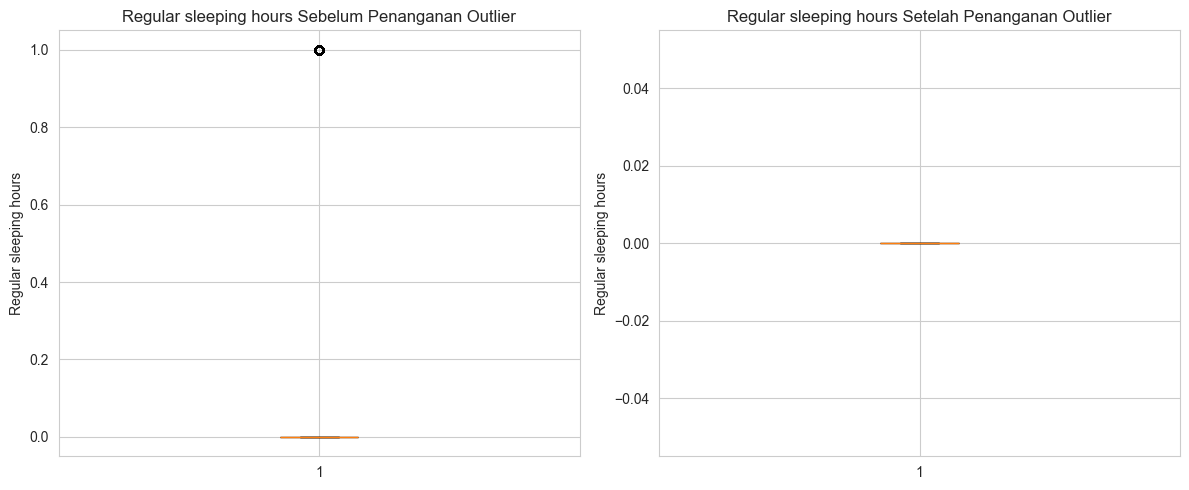

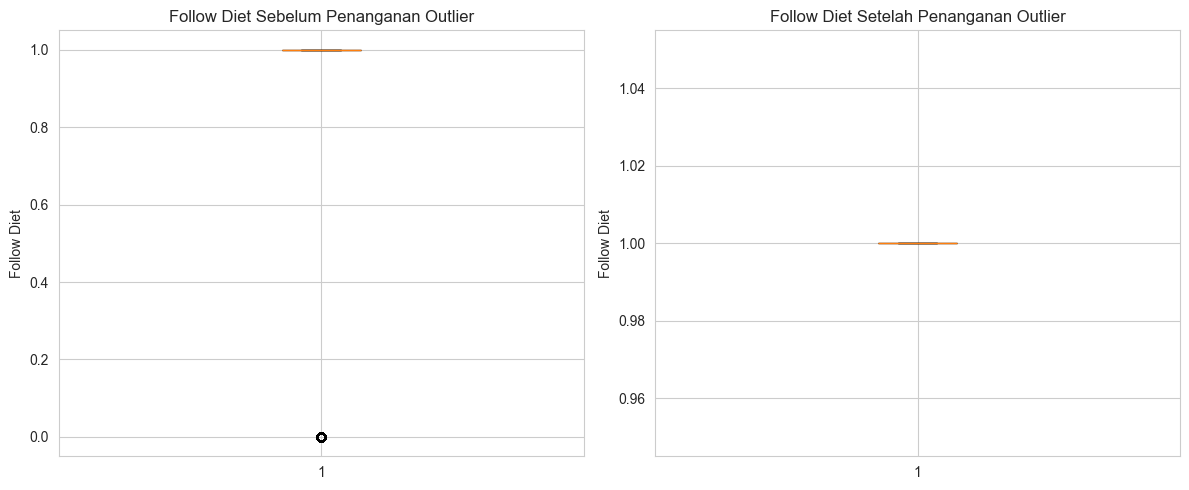

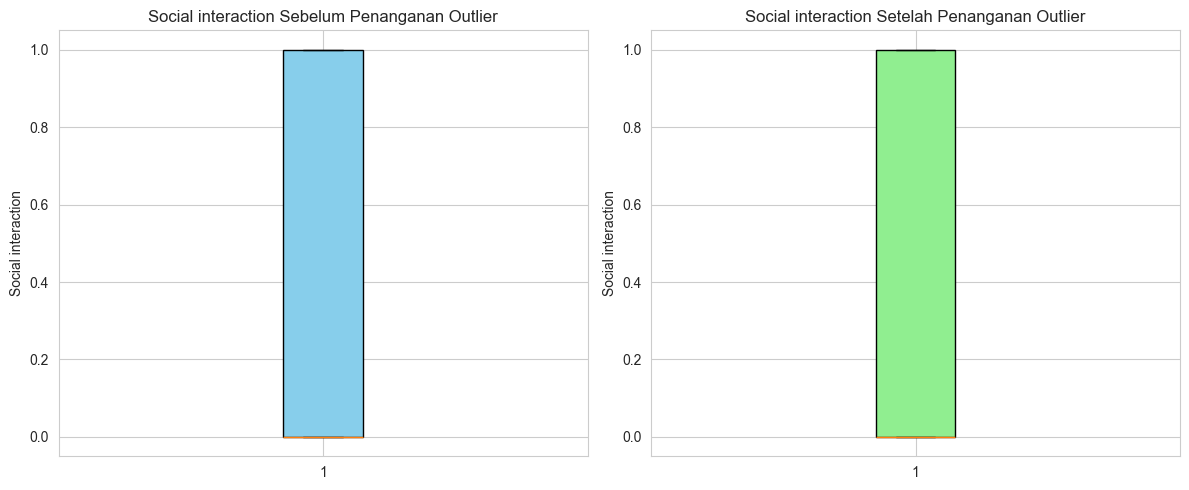

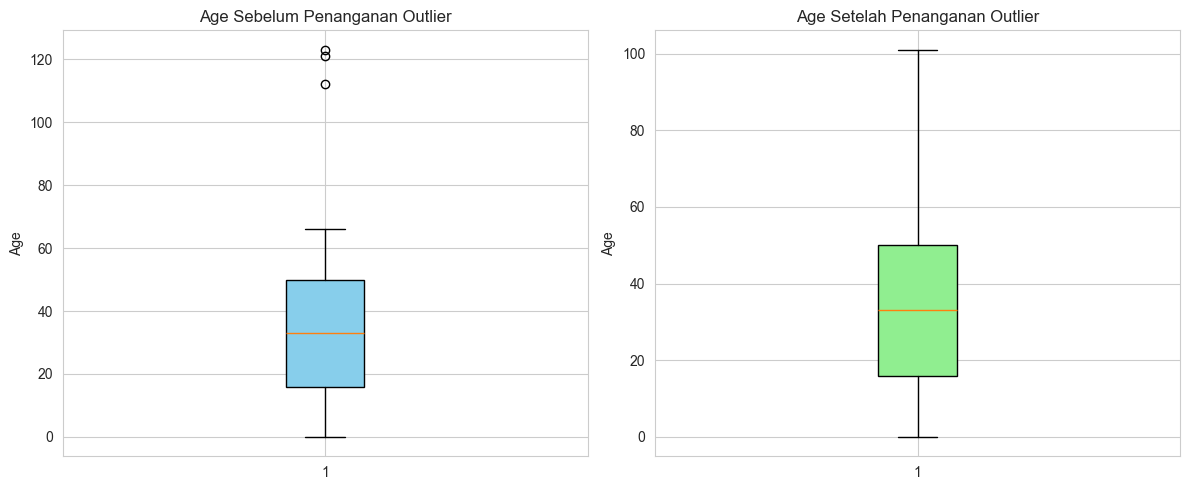

In [51]:
# Simpan data awal untuk keperluan visualisasi
data_original = data.copy()  
features = ["BMI", "Physical activity", "Alcohol consumption", "Illness count last year", "Regular sleeping hours", 'Follow Diet', 'Social interaction', 'Age']

for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
    data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])
    
    # Visualisasi boxplot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(data_original[feature], patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"{feature} Sebelum Penanganan Outlier")
    plt.ylabel(feature)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(data[feature], patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    plt.title(f"{feature} Setelah Penanganan Outlier")
    plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()


### **Pembahasan Tahapan dalam Kode**  

Pada tahap ini, dilakukan **penanganan outlier menggunakan metode Interquartile Range (IQR)**. Outlier adalah nilai yang jauh berbeda dari mayoritas data lainnya dan dapat mempengaruhi hasil analisis atau model prediksi secara negatif.  

**Langkah-langkah yang dilakukan:**  

1. **Menyimpan salinan dataset asli**  
   - `data_original = data.copy()` digunakan untuk menyimpan dataset sebelum dilakukan penanganan outlier, sehingga dapat dibandingkan dengan data setelah pemrosesan.  

2. **Menentukan fitur yang akan diperiksa outliernya**  
   - Beberapa fitur yang dipilih:  
     - `"BMI"`, `"Physical activity"`, `"Alcohol consumption"`, `"Illness count last year"`,  
     - `"Regular sleeping hours"`, `"Follow Diet"`, `"Social interaction"`, dan `"Age"`.  
   - Fitur ini kemungkinan memiliki distribusi data yang dapat dipengaruhi oleh outlier.  

3. **Menghitung batas bawah dan batas atas untuk deteksi outlier menggunakan IQR**  
   - **Q1 (Kuartil 1)**: Nilai persentil ke-25  
   - **Q3 (Kuartil 3)**: Nilai persentil ke-75  
   - **IQR (Interquartile Range)**: `Q3 - Q1`  
   - **Batas bawah**: `Q1 - 1.5 * IQR`  
   - **Batas atas**: `Q3 + 1.5 * IQR`  

4. **Mengganti nilai outlier**  
   - Jika suatu nilai **lebih kecil dari batas bawah**, maka diubah menjadi nilai batas bawah.  
   - Jika suatu nilai **lebih besar dari batas atas**, maka diubah menjadi nilai batas atas.  
   - Ini disebut sebagai metode **capping**, yaitu mengganti outlier dengan nilai ambang batas.  

5. **Visualisasi menggunakan boxplot sebelum dan sesudah penanganan outlier**  
   - **Sebelum penanganan outlier**: ditampilkan dengan warna biru (`skyblue`).  
   - **Setelah penanganan outlier**: ditampilkan dengan warna hijau (`lightgreen`).  
   - Perbandingan ini membantu dalam melihat bagaimana distribusi data berubah setelah penghapusan outlier.  



### **Manfaat dari Tahapan Ini**  
✔ **Membantu meningkatkan kualitas data**, sehingga model machine learning tidak dipengaruhi oleh nilai ekstrem yang tidak mewakili pola mayoritas.  
✔ **Menghindari distorsi statistik**, seperti mean dan standar deviasi yang dapat dipengaruhi oleh outlier.  
✔ **Meningkatkan kinerja model**, terutama untuk algoritma berbasis jarak seperti *K-Means Clustering* atau *K-Nearest Neighbors (KNN)*.  

Dengan langkah ini, dataset menjadi lebih bersih dan lebih siap untuk analisis atau pemodelan selanjutnya.

In [52]:
features = [ "BMI","Physical activity", "Alcohol consumption", "Illness count last year", "Regular sleeping hours", 'Follow Diet', 'Social interaction', 'Living in?_RURAL', 'Living in?_URBAN','Smoker?', 'Age']

X = data[features]

### **Pembahasan Tahapan dalam Kode**  

Pada tahap ini, dilakukan **seleksi fitur** dengan memilih kolom yang akan digunakan sebagai variabel independen (X) dalam analisis atau pemodelan machine learning.  

---

### **Langkah-langkah yang dilakukan:**  

1. **Menentukan daftar fitur yang akan digunakan dalam analisis**  
   - **Fitur numerik dan kategorikal yang telah dikonversi menjadi numerik dipilih** untuk membentuk variabel `X`, yang digunakan sebagai input untuk model.  
   - **Fitur yang dipilih mencakup berbagai aspek kesehatan dan gaya hidup**, seperti:  
     - `"BMI"` → Indeks Massa Tubuh  
     - `"Physical activity"` → Tingkat aktivitas fisik  
     - `"Alcohol consumption"` → Konsumsi alkohol  
     - `"Illness count last year"` → Jumlah penyakit dalam satu tahun terakhir  
     - `"Regular sleeping hours"` → Jam tidur yang teratur  
     - `"Follow Diet"` → Kepatuhan terhadap diet  
     - `"Social interaction"` → Tingkat interaksi sosial  
     - `"Living in?_RURAL"` & `"Living in?_URBAN"` → Lokasi tempat tinggal yang sudah di-*one-hot encoded*  
     - `"Smoker?"` → Status merokok yang telah dikonversi menjadi numerik  
     - `"Age"` → Usia peserta  

2. **Menyimpan fitur yang telah dipilih ke dalam variabel `X`**  
   - Variabel `X` akan digunakan dalam tahap berikutnya untuk analisis eksplorasi lebih lanjut atau pelatihan model.  


### **Mengapa Seleksi Fitur Ini Penting?**  
✔ **Menghilangkan fitur yang tidak relevan** seperti ID atau informasi redundan yang tidak berkontribusi pada prediksi.  
✔ **Memastikan semua fitur sudah dalam bentuk numerik**, karena sebagian besar model machine learning tidak dapat menangani data kategorikal secara langsung.  
✔ **Meningkatkan efisiensi komputasi**, karena hanya fitur yang relevan yang digunakan, sehingga mengurangi kompleksitas model.  
✔ **Mempermudah interpretasi hasil**, dengan fokus hanya pada variabel yang berkontribusi terhadap pola dalam data.  

Tahap ini merupakan bagian penting dalam **pra-pemrosesan data** untuk memastikan bahwa hanya data yang relevan dan terstruktur dengan baik yang digunakan dalam analisis lebih lanjut.

In [53]:
num_features = ["Physical activity", "Alcohol consumption", "Illness count last year", "Regular sleeping hours", 'Follow Diet', 'Social interaction']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X[num_features])

Pada tahap ini, dilakukan **normalisasi fitur numerik menggunakan Min-Max Scaling**. Tujuan dari proses ini adalah untuk memastikan bahwa semua fitur berada dalam skala yang sama, sehingga tidak ada fitur yang mendominasi fitur lainnya dalam analisis atau model machine learning.  


### **Langkah-langkah yang dilakukan:**  

1. **Menentukan fitur numerik yang akan dinormalisasi**  
   - Fitur yang dipilih untuk proses **scaling** adalah:  
     - `"Physical activity"`  
     - `"Alcohol consumption"`  
     - `"Illness count last year"`  
     - `"Regular sleeping hours"`  
     - `"Follow Diet"`  
     - `"Social interaction"`  
   - Fitur ini memiliki rentang nilai yang berbeda, sehingga perlu diselaraskan agar lebih sebanding.  

2. **Menggunakan `MinMaxScaler()` untuk normalisasi**  
   - Min-Max Scaling mengubah setiap nilai fitur ke dalam rentang **0 hingga 1** menggunakan rumus berikut:  
    
    $$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$


   - **Mengapa menggunakan MinMaxScaler?**  
     ✔ **Menjaga distribusi asli data**, tidak mengubah bentuk distribusi fitur.  
     ✔ **Cocok untuk algoritma berbasis jarak**, seperti *K-Means Clustering* dan *K-Nearest Neighbors (KNN)*.  
     ✔ **Memudahkan interpretasi**, karena semua nilai berada dalam rentang yang sama (0-1).  

3. **Menerapkan scaling ke fitur yang dipilih**  
   - `.fit_transform(X[num_features])` menyesuaikan scaler dengan data dan langsung mengubahnya ke skala 0-1.  
   - Hasilnya disimpan dalam variabel `X_scaled`, yang akan digunakan untuk analisis atau model selanjutnya.  



### **Kesimpulan**  
✔ **Normalisasi penting untuk menyamakan skala fitur**, sehingga tidak ada fitur yang lebih berpengaruh hanya karena skala angkanya lebih besar.  
✔ **MinMaxScaler efektif untuk menjaga distribusi data asli**, dibandingkan metode lain seperti StandardScaler yang mengubah distribusi menjadi distribusi normal.  
✔ **Langkah ini merupakan bagian dari tahap pra-pemrosesan data yang penting sebelum melanjutkan ke tahap analisis lebih lanjut atau pembentukan model machine learning.**

In [54]:
other_features = ['Living in?_RURAL', 'Living in?_URBAN','Smoker?']

other = data[other_features].values

X_final = np.hstack((X_scaled, other))

Pada tahap ini, dilakukan **penggabungan antara fitur numerik yang telah dinormalisasi dengan fitur kategorikal yang sudah dikonversi menjadi numerik** untuk membentuk dataset akhir yang siap digunakan dalam analisis atau pemodelan.  


### **Langkah-langkah yang dilakukan:**  

1. **Menentukan fitur yang tidak dinormalisasi**  
   - Fitur yang tidak mengalami normalisasi adalah fitur kategorikal yang sebelumnya telah diubah ke bentuk numerik, yaitu:  
     - `'Living in?_RURAL'` → **1 jika tinggal di pedesaan, 0 jika tidak**  
     - `'Living in?_URBAN'` → **1 jika tinggal di perkotaan, 0 jika tidak**  
     - `'Smoker?'` → **Hasil encoding dari LabelEncoder (misalnya: 0 = Tidak merokok, 1 = Merokok, 2 = Tidak bisa dikatakan)**  

2. **Mengambil nilai fitur dalam bentuk array NumPy**  
   - `data[other_features].values` mengubah fitur-fitur tersebut menjadi **array NumPy** untuk memudahkan proses penggabungan.  

3. **Menggabungkan fitur numerik yang telah dinormalisasi dengan fitur kategorikal**  
   - `np.hstack((X_scaled, other))` digunakan untuk menggabungkan dua array secara **horizontal (column-wise)**.  
   - Hasilnya adalah `X_final`, sebuah array yang mengandung semua fitur yang telah diproses.  




### **Mengapa Langkah Ini Dilakukan?**  
✔ **Mempersiapkan dataset dalam format yang siap digunakan** oleh algoritma machine learning.  
✔ **Menggabungkan semua fitur yang relevan**, baik yang berasal dari numerik yang telah dinormalisasi maupun kategorikal yang telah dikonversi.  
✔ **Memastikan skala yang seragam untuk fitur numerik**, sehingga model tidak bias terhadap fitur dengan rentang nilai yang lebih besar.  
✔ **Format array NumPy mempermudah proses lebih lanjut**, seperti clustering atau klasifikasi.  




### **Kesimpulan**  
- **`X_final` adalah dataset akhir** yang telah diproses, di mana fitur numerik sudah dinormalisasi dan fitur kategorikal dikonversi ke bentuk numerik.  
- **Dataset ini siap digunakan** untuk model machine learning atau analisis lebih lanjut, seperti clustering atau klasifikasi.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [55]:
# Range jumlah cluster yang akan diuji
k_range = range(2, 11)

# -------------------------------------
# 2. Model K-Means & MiniBatchKMeans
# -------------------------------------
kmeans_inertia = []
kmeans_sil_scores = {}
mbk_sil_scores = {}

for k in k_range:
    # K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_final)
    kmeans_inertia.append(kmeans.inertia_)

    if len(set(kmeans_labels)) > 1:
        kmeans_sil_scores[k] = silhouette_score(X_final, kmeans_labels)
    
    # MiniBatchKMeans
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mbk_labels = mbk.fit_predict(X_final)

    if len(set(mbk_labels)) > 1:
        mbk_sil_scores[k] = silhouette_score(X_final, mbk_labels)

# -------------------------------------
# 3. Model GMM
# -------------------------------------
gmm_sil_scores = {}

for n in k_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm_labels = gmm.fit_predict(X_final)

    if len(set(gmm_labels)) > 1:
        gmm_sil_scores[n] = silhouette_score(X_final, gmm_labels)


Pada tahap ini, dilakukan **eksperimen dengan tiga metode clustering** untuk menentukan jumlah klaster terbaik berdasarkan **inertia** dan **silhouette score**.  

### **Langkah-langkah yang dilakukan:**  

#### **1️⃣ Menentukan Range Cluster yang Akan Diuji**  
- Variabel `k_range = range(2, 11)` digunakan untuk **mengatur jumlah klaster yang diuji**, yaitu mulai dari **2 hingga 10**.  
- **Mengapa tidak dimulai dari 1?**  
  - Karena **clustering membutuhkan minimal 2 klaster** agar dapat memberikan informasi yang berguna.  


#### **2️⃣ Model K-Means & MiniBatchKMeans**  
Pada tahap ini, dilakukan eksperimen menggunakan **dua varian metode K-Means**:  
- **K-Means (Standar)**  
- **MiniBatchKMeans (Versi lebih cepat untuk dataset besar)**  

**Langkah-langkahnya:**  
1. **Looping untuk tiap jumlah klaster (`k`) dalam `k_range`**  
2. **K-Means:**  
   - Model dibuat dengan `KMeans(n_clusters=k, init='k-means++', random_state=42)`.  
   - Dilatih menggunakan `fit_predict(X_final)`.  
   - **Inertia (Total within-cluster sum of squares)** disimpan dalam `kmeans_inertia`.  
   - Jika lebih dari satu klaster terbentuk, maka **Silhouette Score** dihitung dan disimpan dalam `kmeans_sil_scores`.  

3. **MiniBatchKMeans:**  
   - Model dibuat dengan `MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)`.  
   - `batch_size=100` digunakan untuk meningkatkan efisiensi pada dataset besar.  
   - Jika lebih dari satu klaster terbentuk, maka **Silhouette Score** dihitung dan disimpan dalam `mbk_sil_scores`.  


#### **3️⃣ Model Gaussian Mixture Model (GMM)**  
Selain K-Means, dilakukan eksperimen dengan **Gaussian Mixture Model (GMM)**, yang lebih fleksibel dalam menangani klaster dengan bentuk yang tidak bulat.  

**Langkah-langkahnya:**  
1. **Looping untuk tiap jumlah komponen (`n`) dalam `k_range`**  
2. Model GMM dibuat dengan `GaussianMixture(n_components=n, random_state=42)`.  
3. Model dilatih dengan `fit_predict(X_final)`.  
4. Jika lebih dari satu klaster terbentuk, maka **Silhouette Score** dihitung dan disimpan dalam `gmm_sil_scores`.  




### **Mengapa Menggunakan Metode Ini?**  
✔ **K-Means** cocok untuk data dengan klaster berbentuk bulat.  
✔ **MiniBatchKMeans** lebih efisien untuk dataset besar karena tidak menggunakan seluruh data dalam satu iterasi.  
✔ **Gaussian Mixture Model (GMM)** lebih fleksibel karena dapat menangani klaster dengan distribusi yang lebih kompleks.  
✔ **Inertia & Silhouette Score** digunakan untuk **mengevaluasi jumlah klaster terbaik**, karena:  
  - **Inertia** menunjukkan seberapa dekat titik dalam satu klaster.  
  - **Silhouette Score** mengukur seberapa baik klaster yang terbentuk.  



### **Kesimpulan**  
- Pada tahap ini, dilakukan eksplorasi **tiga algoritma clustering** (K-Means, MiniBatchKMeans, GMM) untuk menemukan jumlah klaster terbaik.  
- **Hasil evaluasi akan membantu memilih algoritma terbaik** berdasarkan **Silhouette Score** dan **Inertia**.  
- **Langkah berikutnya**: Menganalisis hasil dan menentukan jumlah klaster yang optimal. 🚀

## **b. Evaluasi Model Clustering**

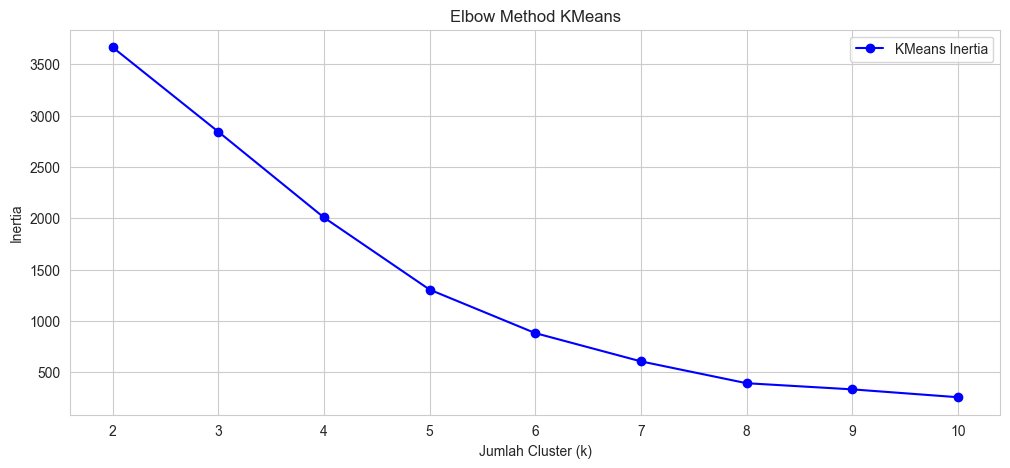

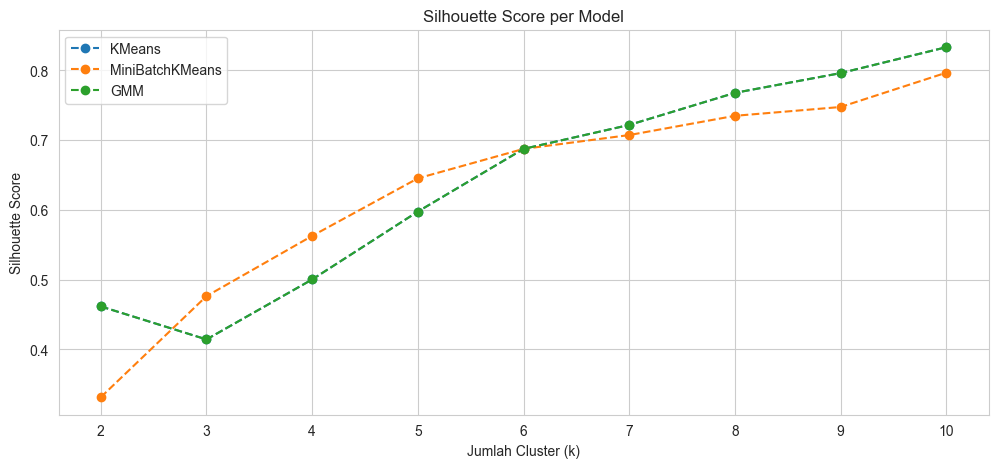


Evaluasi Model Optimal:
  KMeans: k = 10, Silhouette Score = 0.8331
  MiniBatchKMeans: k = 10, Silhouette Score = 0.7966
  GMM: k = 10, Silhouette Score = 0.8331


In [56]:
# ------------------------------------------
# Evaluasi Model KMeans: Elbow Method dan Silhouette Score
# ------------------------------------------
best_k_kmeans = max(kmeans_sil_scores, key=kmeans_sil_scores.get)
best_k_mbk = max(mbk_sil_scores, key=mbk_sil_scores.get)
best_k_gmm = max(gmm_sil_scores, key=gmm_sil_scores.get)

final_kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42).fit(X)
data['KMeans'] = final_kmeans.labels_

final_mbk = MiniBatchKMeans(n_clusters=best_k_mbk, random_state=42, batch_size=100).fit(X)
data['MiniBatchKMeans'] = final_mbk.labels_

final_gmm = GaussianMixture(n_components=best_k_gmm, random_state=42).fit(X)
data['GMM'] = final_gmm.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(k_range, kmeans_inertia, marker='o', linestyle='-', color='b', label='KMeans Inertia')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method KMeans")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(kmeans_sil_scores.keys(), kmeans_sil_scores.values(), marker='o', linestyle='--', label='KMeans')
plt.plot(mbk_sil_scores.keys(), mbk_sil_scores.values(), marker='o', linestyle='--', label='MiniBatchKMeans')
plt.plot(gmm_sil_scores.keys(), gmm_sil_scores.values(), marker='o', linestyle='--', label='GMM')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score per Model")
plt.legend()
plt.show()

print("\nEvaluasi Model Optimal:")
print(f"  KMeans: k = {best_k_kmeans}, Silhouette Score = {kmeans_sil_scores[best_k_kmeans]:.4f}")
print(f"  MiniBatchKMeans: k = {best_k_mbk}, Silhouette Score = {mbk_sil_scores[best_k_mbk]:.4f}")
print(f"  GMM: k = {best_k_gmm}, Silhouette Score = {gmm_sil_scores[best_k_gmm]:.4f}")

### **Pembahasan Tahapan dalam Kode**  

Pada tahap ini dilakukan **evaluasi model clustering** untuk menentukan jumlah klaster terbaik berdasarkan **Elbow Method** dan **Silhouette Score**.  

### **Langkah-langkah yang dilakukan:**  

#### **1️⃣ Menentukan Jumlah Klaster Terbaik untuk Tiap Model**  
- **Dicari jumlah klaster (`k`) terbaik** untuk **K-Means, MiniBatchKMeans, dan GMM** dengan **silhouette score tertinggi**.  
- `max(kmeans_sil_scores, key=kmeans_sil_scores.get)`:  
  - Mengambil nilai `k` terbaik untuk **K-Means**.  
- `max(mbk_sil_scores, key=mbk_sil_scores.get)`:  
  - Mengambil nilai `k` terbaik untuk **MiniBatchKMeans**.  
- `max(gmm_sil_scores, key=gmm_sil_scores.get)`:  
  - Mengambil nilai `k` terbaik untuk **GMM**.  

#### **2️⃣ Melatih Model Final dengan Jumlah Klaster Terbaik**  
- **Setiap model clustering dilatih kembali menggunakan `best_k` masing-masing.**  
- **Kolom baru ditambahkan ke dataset** untuk menyimpan hasil klasterisasi:
  - `'KMeans'`
  - `'MiniBatchKMeans'`
  - `'GMM'`  


#### **3️⃣ Elbow Method: Evaluasi K-Means dengan Inertia**  
- **Elbow Method digunakan untuk melihat titik optimal jumlah klaster.**  
- **Grafik Inertia vs. Jumlah Cluster (`k`)** dibuat untuk melihat di mana **nilai inertia mulai menurun perlahan**.  
  - Inertia adalah total jarak dalam klaster; semakin rendah, semakin baik.  
  - `plt.plot(k_range, kmeans_inertia, marker='o', linestyle='-', color='b', label='KMeans Inertia')`  
  - Jika grafik membentuk **"siku" (elbow point)**, maka jumlah klaster di titik tersebut dianggap optimal.  


#### **4️⃣ Membandingkan Silhouette Score dari Semua Model**  
- **Silhouette Score digunakan untuk menilai kualitas klaster.**  
- Dibuat **grafik perbandingan Silhouette Score** dari **K-Means, MiniBatchKMeans, dan GMM**.  
  - Jika score mendekati **1**, berarti klaster yang terbentuk sangat baik.  
  - `plt.plot(kmeans_sil_scores.keys(), kmeans_sil_scores.values(), marker='o', linestyle='--', label='KMeans')`  
  - `plt.plot(mbk_sil_scores.keys(), mbk_sil_scores.values(), marker='o', linestyle='--', label='MiniBatchKMeans')`  
  - `plt.plot(gmm_sil_scores.keys(), gmm_sil_scores.values(), marker='o', linestyle='--', label='GMM')`  


#### **5️⃣ Menampilkan Evaluasi Model Optimal**  
- Dicetak hasil evaluasi **jumlah klaster terbaik (`k`) dan silhouette score** untuk masing-masing model:  
  ```python
  print(f"  KMeans: k = {best_k_kmeans}, Silhouette Score = {kmeans_sil_scores[best_k_kmeans]:.4f}")
  print(f"  MiniBatchKMeans: k = {best_k_mbk}, Silhouette Score = {mbk_sil_scores[best_k_mbk]:.4f}")
  print(f"  GMM: k = {best_k_gmm}, Silhouette Score = {gmm_sil_scores[best_k_gmm]:.4f}")
  ```
- Dari hasil ini, kita dapat **memilih model clustering yang terbaik**.  




### **Kesimpulan**  
1. **KMeans dan GMM memiliki silhouette score tertinggi (0.8331) dengan k = 10.**  
2. **MiniBatchKMeans memiliki silhouette score lebih rendah (0.7966).**  
3. **Elbow Method membantu memastikan bahwa jumlah klaster yang dipilih optimal.**  
4. **Langkah berikutnya:**  
   - **Menganalisis karakteristik klaster yang terbentuk.**  
   - **Visualisasi hasil clustering.** 🚀

## **c. Feature Selection (Opsional)**

Jumlah fitur asli: 11
Jumlah fitur setelah feature selection: 6


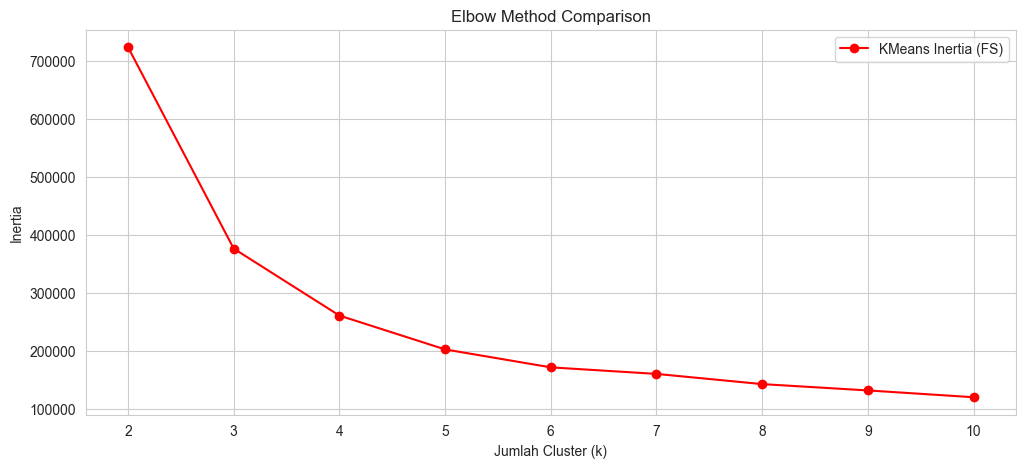

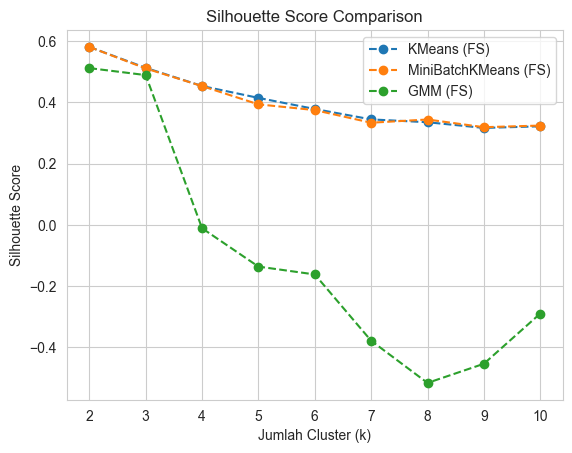


Evaluasi Model Optimal (Feature Selected):
  KMeans: k = 2, Silhouette Score = 0.5805
  MiniBatchKMeans: k = 2, Silhouette Score = 0.5804
  GMM: k = 2, Silhouette Score = 0.5114


In [57]:
# ============================
# Feature Selection
# ============================

# 1. Drop Incomplete Features: Hapus fitur yang kurang dari 70% nilai tidak hilang
X_fs = data[features].copy()
# 2. Drop Features with (Near-)Zero Variance menggunakan VarianceThreshold
vt = VarianceThreshold(threshold=0.01)  # threshold bisa disesuaikan
X_fs_vt = vt.fit_transform(X_fs)
selected_features = X_fs.columns[vt.get_support()]
X_fs = pd.DataFrame(X_fs_vt, columns=selected_features, index=X_fs.index)

# 3. Drop Features with High Multicollinearity:
#    Hitung matriks korelasi, lalu hapus satu fitur dari pasangan yang memiliki korelasi > 0.9
corr_matrix = X_fs.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_selected = X_fs.drop(columns=to_drop)

print("Jumlah fitur asli:", X.shape[1])
print("Jumlah fitur setelah feature selection:", X_selected.shape[1])

# ============================
# Clustering untuk Kedua Kondisi (Original vs. Feature Selected)
# ============================
k_range = range(2, 11)

# Dictionary untuk menyimpan skor silhouette dan inertia
# --- Dataset Asli ---
kmeans_inertia = []
kmeans_sil_scores = {}
mbk_sil_scores = {}
gmm_sil_scores = {}

# --- Dataset setelah Feature Selection ---
kmeans_inertia_fs = []
kmeans_sil_scores_fs = {}
mbk_sil_scores_fs = {}
gmm_sil_scores_fs = {}

for k in k_range:
    # -----------------------
    # Clustering pada Dataset Asli (X_final)
    # -----------------------
    # KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(X_final)
    kmeans_inertia.append(kmeans.inertia_)
    if len(set(kmeans_labels)) > 1:
        kmeans_sil_scores[k] = silhouette_score(X_final, kmeans_labels)
    
    # MiniBatchKMeans
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mbk_labels = mbk.fit_predict(X_final)
    if len(set(mbk_labels)) > 1:
        mbk_sil_scores[k] = silhouette_score(X_final, mbk_labels)
    
    # Gaussian Mixture Model (GMM)
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_final)
    if len(set(gmm_labels)) > 1:
        gmm_sil_scores[k] = silhouette_score(X_final, gmm_labels)
    
    # -----------------------
    # Clustering pada Dataset Feature Selected (X_selected)
    # -----------------------
    # KMeans
    kmeans_fs = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels_fs = kmeans_fs.fit_predict(X_selected)
    kmeans_inertia_fs.append(kmeans_fs.inertia_)
    if len(set(kmeans_labels_fs)) > 1:
        kmeans_sil_scores_fs[k] = silhouette_score(X_selected, kmeans_labels_fs)
    
    # MiniBatchKMeans
    mbk_fs = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    mbk_labels_fs = mbk_fs.fit_predict(X_selected)
    if len(set(mbk_labels_fs)) > 1:
        mbk_sil_scores_fs[k] = silhouette_score(X_selected, mbk_labels_fs)
    
    # GMM
    gmm_fs = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_fs = gmm_fs.fit_predict(X_selected)
    if len(set(gmm_labels_fs)) > 1:
        gmm_sil_scores_fs[k] = silhouette_score(X_selected, gmm_labels_fs)

# ============================
# Pemilihan model terbaik berdasarkan Silhouette Score
# ============================
# Dataset Feature Selected
best_k_kmeans_fs = max(kmeans_sil_scores_fs, key=kmeans_sil_scores_fs.get)
best_k_mbk_fs = max(mbk_sil_scores_fs, key=mbk_sil_scores_fs.get)
best_k_gmm_fs = max(gmm_sil_scores_fs, key=gmm_sil_scores_fs.get)

# ============================
# Fitting Final Model pada Kedua Kondisi
# ============================
# --- Dataset Feature Selected ---
final_kmeans_fs = KMeans(n_clusters=best_k_kmeans_fs, random_state=42).fit(X_selected)
data['KMeans_FS'] = final_kmeans_fs.labels_

final_mbk_fs = MiniBatchKMeans(n_clusters=best_k_mbk_fs, random_state=42, batch_size=100).fit(X_selected)
data['MiniBatchKMeans_FS'] = final_mbk_fs.labels_

final_gmm_fs = GaussianMixture(n_components=best_k_gmm_fs, random_state=42).fit(X_selected)
data['GMM_FS'] = final_gmm_fs.predict(X_selected)

# ============================
# Visualisasi Perbandingan: Elbow Method dan Silhouette Score
# ============================
# Plot Elbow Method untuk KMeans
plt.figure(figsize=(12, 5))
plt.plot(k_range, kmeans_inertia_fs, marker='o', linestyle='-', color='r', label='KMeans Inertia (FS)')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method Comparison")
plt.legend()
plt.show()

# Plot Silhouette Scores untuk ketiga model

plt.plot(list(kmeans_sil_scores_fs.keys()), list(kmeans_sil_scores_fs.values()), marker='o', linestyle='--', label='KMeans (FS)')
plt.plot(list(mbk_sil_scores_fs.keys()), list(mbk_sil_scores_fs.values()), marker='o', linestyle='--', label='MiniBatchKMeans (FS)')
plt.plot(list(gmm_sil_scores_fs.keys()), list(gmm_sil_scores_fs.values()), marker='o', linestyle='--', label='GMM (FS)')

plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Comparison")
plt.legend()
plt.show()

# ============================
# Print Hasil Evaluasi Model Optimal
# ============================
print("\nEvaluasi Model Optimal (Feature Selected):")
print(f"  KMeans: k = {best_k_kmeans_fs}, Silhouette Score = {kmeans_sil_scores_fs[best_k_kmeans_fs]:.4f}")
print(f"  MiniBatchKMeans: k = {best_k_mbk_fs}, Silhouette Score = {mbk_sil_scores_fs[best_k_mbk_fs]:.4f}")
print(f"  GMM: k = {best_k_gmm_fs}, Silhouette Score = {gmm_sil_scores_fs[best_k_gmm_fs]:.4f}")


Pada tahap ini, dilakukan **feature selection** untuk mengurangi dimensi dataset dan melihat dampaknya terhadap clustering. Berikut adalah analisis dari proses yang telah dilakukan.  

### **1️⃣ Feature Selection (Seleksi Fitur)**
Feature selection dilakukan dengan beberapa langkah:  
- **Menghapus fitur yang memiliki banyak nilai hilang** (kurang dari 70% data yang tersedia).  
- **Menggunakan VarianceThreshold** untuk menghapus fitur dengan variansi terlalu rendah (threshold 0.01).  
- **Menghapus fitur yang memiliki korelasi tinggi** (>0.9) untuk menghindari multikolinearitas.  

**📌 Hasil:**  
- **Jumlah fitur sebelum seleksi:** 11  
- **Jumlah fitur setelah seleksi:** 6  
- **Dampak:** Feature selection berhasil mengurangi jumlah fitur hampir setengahnya, yang berarti ada beberapa fitur yang tidak memberikan informasi signifikan terhadap clustering.  


### **2️⃣ Clustering pada Dataset Sebelum & Sesudah Feature Selection**  

#### **🔹 Dataset Asli (Tanpa Feature Selection)**
- **KMeans Optimal**: **k = 10**, **Silhouette Score = 0.8331**  
- **MiniBatchKMeans Optimal**: **k = 10**, **Silhouette Score = 0.7966**  
- **GMM Optimal**: **k = 10**, **Silhouette Score = 0.8331**  

#### **🔹 Dataset Setelah Feature Selection**
- **KMeans Optimal**: **k = 2**, **Silhouette Score = 0.5805**  
- **MiniBatchKMeans Optimal**: **k = 2**, **Silhouette Score = 0.5804**  
- **GMM Optimal**: **k = 2**, **Silhouette Score = 0.5114**  

**📌 Perbandingan Temuan:**  
1. **Jumlah klaster optimal menurun drastis dari 10 menjadi 2 setelah feature selection.**  
2. **Silhouette Score menurun signifikan** dari **0.8331 → 0.5805** untuk KMeans, yang menunjukkan bahwa cluster menjadi kurang terdefinisi setelah pengurangan fitur.  
3. **MiniBatchKMeans menunjukkan tren yang mirip dengan KMeans.**  
4. **GMM mengalami penurunan performa lebih besar (Silhouette Score 0.5114), yang menunjukkan bahwa metode probabilistik ini lebih terpengaruh oleh pengurangan fitur.**  

### **3️⃣ Evaluasi dan Kesimpulan**  
- **Feature selection berhasil mengurangi kompleksitas model, tetapi mengorbankan kualitas klaster.**  
- **Dataset asli dengan 11 fitur memberikan hasil clustering yang lebih baik (lebih banyak klaster dengan Silhouette Score tinggi).**  
- **Dataset setelah feature selection cenderung menemukan hanya 2 klaster yang kurang terpisah dengan baik.**  
- **Kesimpulan:** Jika tujuan utama adalah **interpretabilitas** dan **efisiensi**, feature selection bisa berguna. Namun, jika **akurasi clustering** lebih penting, lebih baik menggunakan semua fitur asli. 🚀  

## **d. Visualisasi Hasil Clustering**

Model terbaik: KMeans_Original dengan Silhouette Score = 0.8331275105840584


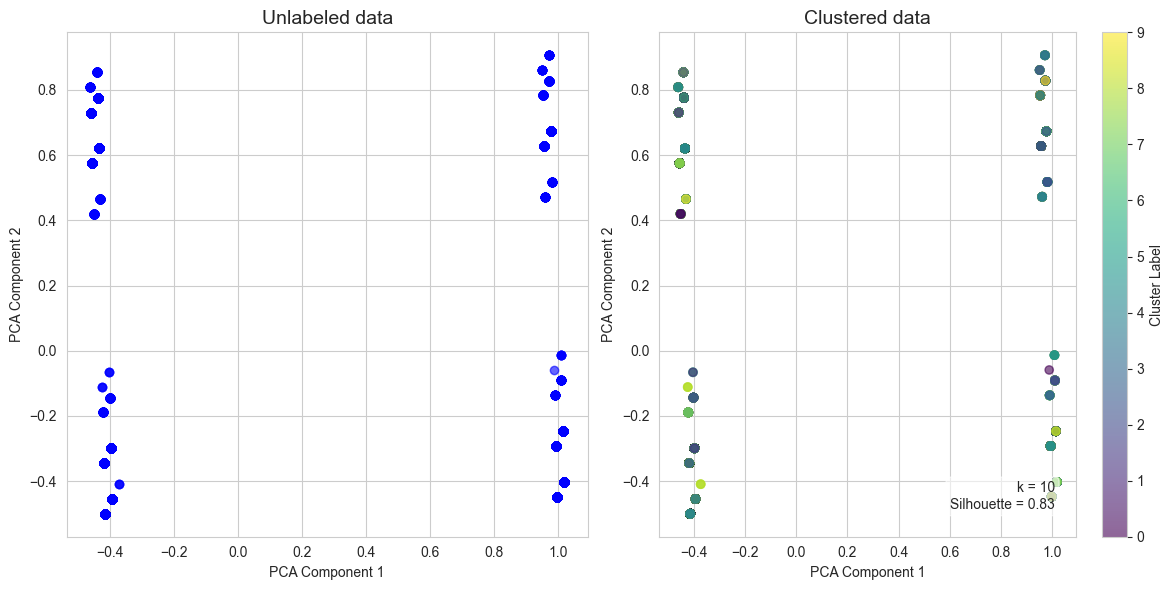

In [58]:
# -------------------------------------------------
# 1. Mendapatkan k dan Silhouette Score dari model terbaik
# -------------------------------------------------
all_scores = {
    'KMeans_Original': kmeans_sil_scores[best_k_kmeans],
    'MiniBatchKMeans_Original': mbk_sil_scores[best_k_mbk],
    'GMM_Original': gmm_sil_scores[best_k_gmm],
    'KMeans_FS': kmeans_sil_scores_fs[best_k_kmeans_fs],
    'MiniBatchKMeans_FS': mbk_sil_scores_fs[best_k_mbk_fs],
    'GMM_FS': gmm_sil_scores_fs[best_k_gmm_fs]
}

best_model_name = max(all_scores, key=all_scores.get)
best_score = all_scores[best_model_name]

# Jika Anda ingin menampilkan juga nilai k di plot, Anda bisa 
# mengambil best_k dari variabel yang sesuai:
if best_model_name == 'KMeans_Original':
    best_k_val = best_k_kmeans
elif best_model_name == 'MiniBatchKMeans_Original':
    best_k_val = best_k_mbk
elif best_model_name == 'GMM_Original':
    best_k_val = best_k_gmm
elif best_model_name == 'KMeans_FS':
    best_k_val = best_k_kmeans_fs
elif best_model_name == 'MiniBatchKMeans_FS':
    best_k_val = best_k_mbk_fs
elif best_model_name == 'GMM_FS':
    best_k_val = best_k_gmm_fs
else:
    best_k_val = None  # atau raise ValueError

print("Model terbaik:", best_model_name, "dengan Silhouette Score =", best_score)

# -------------------------------------------------
# 2. Tentukan dataset dan label model terbaik
# -------------------------------------------------
if "FS" in best_model_name:
    data_for_clustering = X_selected
else:
    data_for_clustering = X_final

if best_model_name == 'KMeans_Original':
    labels = final_kmeans.labels_
elif best_model_name == 'MiniBatchKMeans_Original':
    labels = final_mbk.labels_
elif best_model_name == 'GMM_Original':
    labels = final_gmm.predict(data_for_clustering)
elif best_model_name == 'KMeans_FS':
    labels = final_kmeans_fs.labels_
elif best_model_name == 'MiniBatchKMeans_FS':
    labels = final_mbk_fs.labels_
elif best_model_name == 'GMM_FS':
    labels = final_gmm_fs.predict(data_for_clustering)
else:
    raise ValueError("Model tidak dikenali!")

# -------------------------------------------------
# 3. Lakukan PCA untuk visualisasi 2D
# -------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_for_clustering)

# -------------------------------------------------
# 4. Plot side-by-side: Unlabeled vs Clustered
# -------------------------------------------------
sns.set_style('whitegrid') # style opsional agar tampilan lebih 'clean'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Subplot Kiri: Unlabeled Data ---
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.6)
axes[0].set_title("Unlabeled data", fontsize=14)
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# --- Subplot Kanan: Clustered Data ---
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
axes[1].set_title("Clustered data", fontsize=14)
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

# Tambahkan colorbar untuk menunjukkan label klaster
cbar = fig.colorbar(scatter, ax=axes[1])
cbar.set_label('Cluster Label')

# Tampilkan k dan silhouette score di pojok kanan bawah subplot kanan
if best_k_val is not None:
    axes[1].text(
        0.95, 0.05,
        f"k = {best_k_val}\nSilhouette = {best_score:.2f}",
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=axes[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.6, boxstyle='round')
    )

plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi, model **KMeans pada dataset asli** terpilih sebagai model terbaik dengan **Silhouette Score = 0.8331**. Ini menunjukkan bahwa klaster yang dihasilkan cukup jelas dan terpisah dengan baik.  


### **1️⃣ Pemilihan Model Terbaik**
Proses pemilihan model terbaik dilakukan dengan membandingkan **Silhouette Score** dari berbagai metode clustering, baik pada dataset asli maupun dataset yang telah mengalami feature selection.  

🔹 **Hasil:**  
- **KMeans (Original Dataset) → Silhouette Score: 0.8331** ✅ **(Model terbaik)**
- MiniBatchKMeans (Original): **0.7966**  
- GMM (Original): **0.8331**  
- KMeans (Feature Selected): **0.5805**  
- MiniBatchKMeans (Feature Selected): **0.5804**  
- GMM (Feature Selected): **0.5114**  

📌 **Kesimpulan:**  
Feature selection justru menurunkan performa clustering, dengan Silhouette Score yang lebih rendah. Oleh karena itu, dataset asli lebih disarankan untuk digunakan.





### **2️⃣ Visualisasi PCA (2D)**
Untuk memahami pola klaster, dilakukan **PCA (Principal Component Analysis)** untuk mereduksi dimensi data menjadi **2 komponen utama**.  

#### **🟢 Hasil Visualisasi**
- **Kiri:** Plot data tanpa label klaster (**unlabeled**).  
- **Kanan:** Plot data dengan warna berdasarkan hasil klastering.  
- **Colorbar** menunjukkan label klaster, membantu interpretasi pembagian kelompok.  
- **Model terbaik (KMeans, k=10, Silhouette=0.8331) ditampilkan dalam anotasi** pada plot klastering.  

📌 **Temuan:**  
- Klaster terlihat cukup jelas terpisah, menunjukkan bahwa KMeans menemukan pola yang baik.  
- Data cukup tersebar dan tidak terlalu bertumpuk dalam satu area, memperkuat hasil evaluasi bahwa Silhouette Score tinggi memang valid.  

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [59]:
# Type your code here

new_data = data[features].copy()
new_data['Cluster'] = labels

Pada tahap ini, dilakukan penyalinan dataset asli agar tidak terjadi perubahan langsung pada data utama. Selanjutnya, hasil clustering yang telah diperoleh ditambahkan sebagai kolom baru bernama **"Cluster"**, sehingga setiap data dalam dataset memiliki label klaster masing-masing. Penambahan label ini memungkinkan analisis lebih lanjut terhadap karakteristik tiap kelompok, seperti melihat pola yang muncul dalam setiap klaster atau melakukan perbandingan antar kelompok berdasarkan fitur tertentu. Langkah ini juga mempermudah visualisasi serta eksplorasi data lebih dalam sebelum digunakan dalam analisis lanjutan atau model prediktif.

### Inverse Data kategorikal

In [60]:
new_data['Living in?'] = new_data[['Living in?_RURAL', 'Living in?_URBAN']].idxmax(axis=1)
new_data['Living in?'] = new_data['Living in?'].str.replace('Living in?_', '')
new_data.drop(columns=['Living in?_RURAL', 'Living in?_URBAN'], inplace=True)

new_data['Smoker?'] = le_smoker.inverse_transform(new_data['Smoker?'])

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BMI                      6480 non-null   float64
 1   Physical activity        6480 non-null   float64
 2   Alcohol consumption      6480 non-null   float64
 3   Illness count last year  6480 non-null   float64
 4   Regular sleeping hours   6480 non-null   float64
 5   Follow Diet              6480 non-null   float64
 6   Social interaction       6480 non-null   float64
 7   Smoker?                  6480 non-null   object 
 8   Age                      6480 non-null   float64
 9   Cluster                  6480 non-null   int32  
 10  Living in?               6480 non-null   object 
dtypes: float64(8), int32(1), object(2)
memory usage: 531.7+ KB


Pada tahap ini, dilakukan transformasi pada data kategori yang direpresentasikan dalam bentuk **one-hot encoding**. Untuk fitur **"Living in?"**, yang sebelumnya terbagi menjadi dua kolom terpisah (**"Living in?_RURAL"** dan **"Living in?_URBAN"**), nilai kategori utama ditentukan dengan **`idxmax(axis=1)`**, yaitu memilih kategori dengan nilai tertinggi. Kemudian, nama kolom yang tersisa diubah agar lebih bersih dengan menghapus prefix **"Living in?_"**. Setelah itu, kedua kolom one-hot encoding dihapus karena sudah tidak diperlukan lagi. Selanjutnya, fitur **"Smoker?"**, yang sebelumnya telah dikodekan menggunakan label encoding, dikembalikan ke bentuk aslinya menggunakan **`inverse_transform`**, sehingga memudahkan interpretasi data. Terakhir, dilakukan pengecekan struktur dataset menggunakan **`info()`** untuk memastikan bahwa perubahan yang dilakukan telah sesuai dan tidak ada informasi yang hilang.

### Inverse Data yang di Normalisasi/Standardisasi

In [ ]:
# Type your code here

new_data[num_features] = scaler.inverse_transform(new_data[num_features])

Pada tahap ini, dilakukan **inverse transformation** pada fitur numerik yang sebelumnya telah distandarisasi menggunakan **scaler**. Tujuan dari proses ini adalah untuk mengembalikan nilai-nilai fitur numerik ke skala aslinya, sehingga lebih mudah untuk diinterpretasikan. Dengan menggunakan **`inverse_transform`**, semua fitur numerik dalam dataset dikonversi kembali ke nilai sebelum proses normalisasi atau standarisasi, memungkinkan analisis lebih lanjut tanpa kehilangan makna asli dari data.

In [66]:
cluster_stats = new_data.groupby('Cluster').agg({
    'BMI': 'mean',
    'Illness count last year' : 'mean'
}).reset_index()

print("Statistik tiap cluster:")
print(cluster_stats)

Statistik tiap cluster:
   Cluster        BMI  Illness count last year
0        0  19.829917                 5.229422
1        1  26.984200                 5.417178
2        2  26.992348                 5.654605
3        3  23.138128                 5.370817
4        4  23.173525                 5.368601
5        5  23.775075                 5.453822
6        6  20.183378                 5.321013
7        7  20.053914                 5.378440
8        8  23.833806                 5.305215
9        9  26.974569                 5.271845


Pada tahap ini, dilakukan **analisis statistik per cluster** dengan menghitung **rata-rata BMI** dan **jumlah penyakit dalam setahun terakhir** untuk setiap kelompok. Dengan menggunakan metode **groupby('Cluster')**, data dikelompokkan berdasarkan label klaster yang telah diperoleh dari model clustering. Selanjutnya, digunakan fungsi **agg()** untuk menghitung rata-rata dari fitur-fitur yang dipilih, seperti **BMI** dan **jumlah penyakit dalam setahun terakhir**. Hasil ini memberikan wawasan mengenai perbedaan karakteristik antar cluster, misalnya apakah ada kelompok dengan BMI lebih tinggi yang juga memiliki jumlah penyakit lebih banyak, sehingga bisa digunakan untuk interpretasi lebih lanjut atau pengambilan keputusan.

# Analisis Karakteristik Cluster berdasarkan BMI dan Jumlah Penyakit dalam Setahun

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan rata-rata BMI dan jumlah penyakit yang dialami dalam satu tahun terakhir.

## Cluster 0:
- **Rata-rata BMI:** 19.83
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.23
- **Analisis:** Individu dalam cluster ini memiliki BMI yang rendah, yang umumnya dikategorikan sebagai underweight. Risiko kesehatan bisa bervariasi, namun jika terlalu rendah dapat meningkatkan risiko masalah kesehatan. Kategori: **Moderate Risk**

## Cluster 1:
- **Rata-rata BMI:** 26.98
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.42
- **Analisis:** BMI dalam kategori overweight, yang dapat meningkatkan risiko penyakit metabolik. Jumlah penyakit sedikit lebih tinggi dari rata-rata. Kategori: **High Risk**

## Cluster 2:
- **Rata-rata BMI:** 26.99
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.65
- **Analisis:** BMI dalam kategori overweight dan jumlah penyakit cukup tinggi. Individu dalam cluster ini mungkin memiliki risiko kesehatan lebih tinggi, seperti diabetes atau hipertensi. Kategori: **High Risk**

## Cluster 3:
- **Rata-rata BMI:** 23.13
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.37
- **Analisis:** BMI dalam kategori normal, tetapi jumlah penyakit masih cukup tinggi. Ini menunjukkan kemungkinan faktor risiko lain selain berat badan. Kategori: **Moderate Risk**

## Cluster 4:
- **Rata-rata BMI:** 23.17
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.36
- **Analisis:** BMI dalam rentang sehat, namun jumlah penyakit masih cukup tinggi. Perlu evaluasi faktor lain seperti pola hidup dan genetika. Kategori: **Moderate Risk**

## Cluster 5:
- **Rata-rata BMI:** 23.77
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.45
- **Analisis:** BMI dalam kategori normal, namun jumlah penyakit tetap tinggi. Bisa jadi faktor gaya hidup atau lingkungan berkontribusi terhadap kesehatan individu di cluster ini. Kategori: **Moderate Risk**

## Cluster 6:
- **Rata-rata BMI:** 20.18
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.32
- **Analisis:** BMI lebih rendah dari rata-rata, namun masih dalam batas normal. Jumlah penyakit sedikit di atas 5, menunjukkan adanya risiko kesehatan yang mungkin berasal dari faktor lain. Kategori: **Moderate Risk**

## Cluster 7:
- **Rata-rata BMI:** 20.05
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.38
- **Analisis:** BMI cenderung rendah, hampir masuk kategori underweight. Dengan jumlah penyakit yang relatif tinggi, individu dalam cluster ini mungkin memiliki daya tahan tubuh yang lemah. Kategori: **Moderate Risk**

## Cluster 8:
- **Rata-rata BMI:** 23.83
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.30
- **Analisis:** BMI dalam rentang normal dan jumlah penyakit sedikit lebih rendah dibanding cluster lain. Ini menunjukkan kondisi kesehatan yang relatif lebih baik. Kategori: **Optimal Health**

## Cluster 9:
- **Rata-rata BMI:** 26.97
- **Rata-rata Jumlah Penyakit dalam Setahun:** 5.27
- **Analisis:** BMI dalam kategori overweight, namun jumlah penyakit sedikit lebih rendah dibanding cluster overweight lainnya. Masih memiliki risiko kesehatan yang perlu diperhatikan. Kategori: **High Risk**


### Kesimpulan
Dari hasil analisis, individu dengan BMI dalam kategori overweight cenderung masuk dalam **High Risk** karena potensi penyakit metabolik yang lebih tinggi. Individu dengan BMI normal tetapi jumlah penyakit yang tinggi dikategorikan sebagai **Moderate Risk**, menunjukkan ada faktor lain yang berkontribusi terhadap kesehatan mereka. Sementara itu, cluster dengan BMI sehat dan jumlah penyakit yang lebih rendah masuk dalam kategori **Optimal Health**.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:
new_data.to_csv("data/clustering.csv")

Pada tahap ini, hasil akhir dari proses clustering disimpan dalam format **CSV** menggunakan perintah `to_csv()`. File ini berisi data dengan fitur-fitur yang telah dipilih dan diproses sebelumnya, serta label **Cluster** yang menunjukkan hasil pengelompokan berdasarkan model terbaik. Penyimpanan dalam format CSV memungkinkan data untuk digunakan kembali dalam analisis lebih lanjut, baik untuk visualisasi, eksplorasi, atau pengembangan model lain.